# Indian House Price Prediction

- Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

- Importing data and checking out

In [2]:
house= pd.read_csv('INDIA_Housing.csv')

In [3]:
house

,Avg.income,Avg.house age,Avg.number of rooms,Avg. area number of bedrooms,area population,price,address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"Ksfc Layout,Bangalore"
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"Vishweshwara Nagar,Mysore"
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"Jigani,Bangalore"
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,"Sector-1 Vaishali,Ghaziabad"
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,"New Town,Kolkata"
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,"Sus,Pune"
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"Konanakunte,Bangalore"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"Hulimavu,Bangalore"
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,"Mamdapur,Raigad"


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg.income                    5000 non-null   float64
 1   Avg.house age                 5000 non-null   float64
 2   Avg.number of rooms           5000 non-null   float64
 3   Avg. area number of bedrooms  5000 non-null   float64
 4   area population               5000 non-null   float64
 5   price                         5000 non-null   float64
 6   address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
house.describe()

,Avg.income,Avg.house age,Avg.number of rooms,Avg. area number of bedrooms,area population,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [7]:
house.columns

Index(['Avg.income', 'Avg.house age', 'Avg.number of rooms',
       'Avg. area number of bedrooms', 'area population', 'price', 'address'],
      dtype='object')

## Exploratory Data Analysis for House Price Prediction

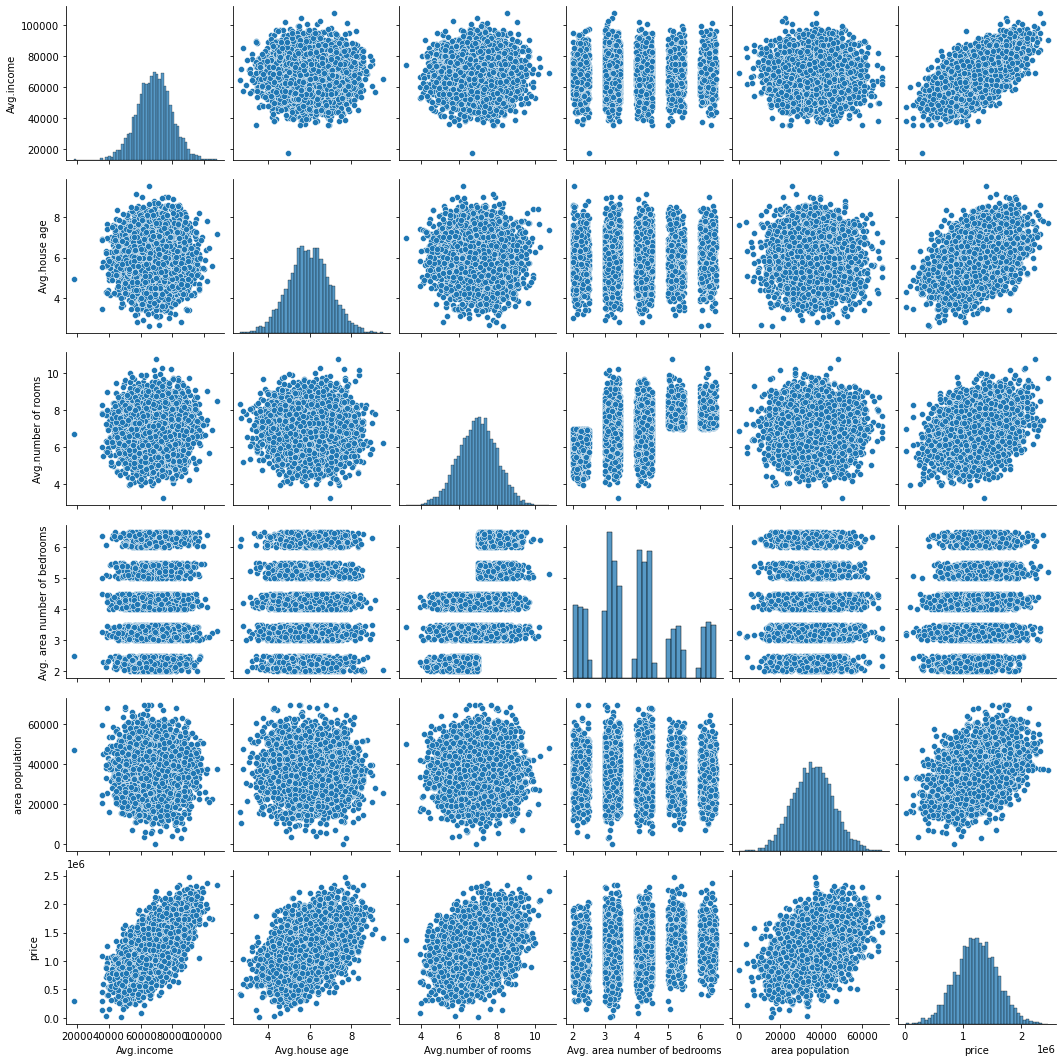

In [8]:
sns.pairplot(house)

E:\setup\anconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

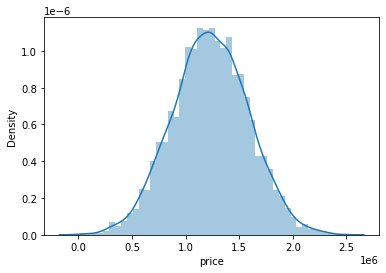

In [9]:
sns.distplot(house['price'])

<AxesSubplot:>

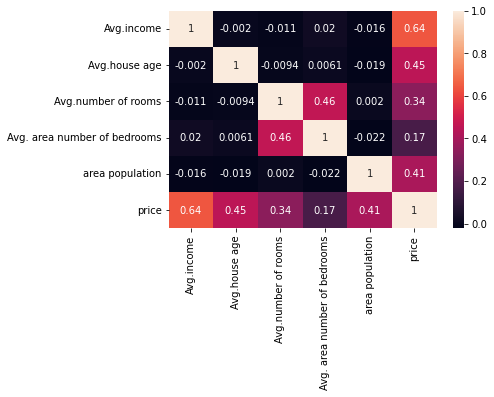

In [10]:
sns.heatmap(house.corr(), annot=True)

## Trainig a model

### X and Y list

In [11]:
X = house[['Avg.income', 'Avg.house age', 'Avg.number of rooms',
       'Avg. area number of bedrooms', 'area population']]

y = house['price']

### Split Data into Train, Test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the LinearRegression Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
learn_model = LinearRegression()

In [16]:
learn_model.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [17]:
print(learn_model.intercept_)

-2640159.796813772


In [18]:
coe_df = pd.DataFrame(learn_model.coef_,X.columns,columns=['Coefficient'])
coe_df

,Coefficient
Avg.income,21.528276
Avg.house age,164883.282027
Avg.number of rooms,122368.678023
Avg. area number of bedrooms,2233.801864
area population,15.150420


## Predictions from our Linear Regression Model

In [19]:
pred = learn_model.predict(X_test)

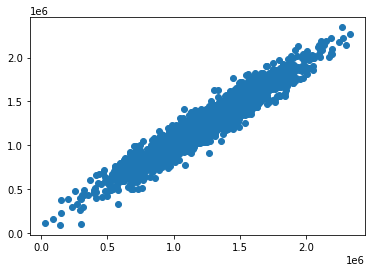

In [21]:
plt.scatter(y_test,pred)

- In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

E:\setup\anconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


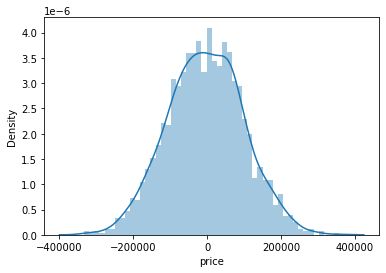

In [22]:
sns.distplot((y_test-pred),bins=50);

- In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

## Regression Evaluation Metrics

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 82288.22250721791
MSE: 10460958905.774706
RMSE: 102278.82921589739
